# бибилиотеки

In [ ]:
# Библиотеки Pytorch
import torch 
import torchvision     # здесь лежит mnist, cifar и много других датасетов и трансформаций для картинок
import torch.nn as nn  # здесь лежат все слои
import torch.utils.data as data             # работа с загрузчиком данных
import torchvision.transforms as transforms
import torchvision.datasets as dsets        # работа с классом Датасет
from torch.autograd import Variable         # для автоматического расчета производных/дифференциатора



In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Model # Импортируем модели keras: Model
from tensorflow.keras.layers import Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization, Dropout # Импортируем стандартные слои keras
from tensorflow.keras import backend as K # Импортируем модуль backend keras'а
from tensorflow.keras.optimizers import Adam # Импортируем оптимизатор Adam
from tensorflow.keras import utils # Импортируем модуль utils библиотеки tensorflow.keras для получения OHE-представления
from google.colab import files # Импортируем Модуль files для работы с файлами
import matplotlib.pyplot as plt # Импортируем модуль pyplot библиотеки matplotlib для построения графиков
from tensorflow.keras.preprocessing import image  # Импортируем модуль image для работы с изображениями
import numpy as np # Импортируем библиотеку numpy
import pandas as pd 
from sklearn.model_selection import train_test_split
import time
import random
import os # Импортируем библиотеку os для раоты с фаловой системой
from PIL import Image # импортируем модель Image для работы с изображениями
import cv2

In [ ]:
from google.colab import drive # Подключаем гугл-диск
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import time

class timex:
    def __enter__(self):
        # Фиксация времени старта процесса
        self.t = time.time()
        return self

    def __exit__(self, type, value, traceback):
        # Вывод времени работы
        print('Время обработки: {:.2f} сек'.format(time.time() - self.t))


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/moduli/')
# import PlotFunctions

import PlotFunctions
print(dir(PlotFunctions))            # просмотр содержимого

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


['K', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'eval_net', 'get_corr', 'ipd', 'librosa', 'load_audio', 'mean_absolute_error', 'mean_squared_error', 'my_f1_score', 'np', 'pd', 'plt', 'plt_figure_accuracy', 'plt_figure_dice_coef', 'plt_figure_f1_score', 'plt_figure_loss', 'plt_figure_mae', 'plt_scatter_pred', 'show_spectre', 'sns']


# Загружаем данные

In [ ]:
BATCH_SIZE = 12
numClasses = 4

IMG_SIZE = 256

img_width = 256
img_height = 256
channels = 3 
target_size = (img_width, img_height)  # размер изображений, которые будут подаваться в модель

Path = '/content/drive/My Drive/ЦП-Москва/RZD/'
imagesDir = Path + 'train256/X/images/'           # 'train256/images/images'
maskDir = Path + 'train256/Y/mask/' 
LabelkDir = Path + 'train256/Y/maskLabel/'          # CLASSы[0,1,2,3]    ; 'train256/mask/mask'
SegDir = Path + 'train256/Segment/' 
Label1HDir = Path + 'train256/Y1H/maskLabel1H/'   # одноканальные (256, 256, 1)

TESTDir = Path + 'TEST_256/TESTimages/'            # TEST256/TESTimages
TESTmaskDir = Path + 'TESTmask256/'
TESTLabel = Path + 'TEST_256/'

Path256 = '/content/drive/My Drive/ЦП-Москва/RZD/train256/'
XTrainDir = '/content/drive/My Drive/ЦП-Москва/RZD/xTrain.npy'


In [ ]:
import pickle
# # Сохранение/восстановление датасета 
# with open('/content/drive/My Drive/ЦП-Москва/RZD/ListsDATA.pickle', 'wb') as pick:
#     pickle.dump((imagesTESTListSize, imagesTESTList, imagesList, maskList), pick)

with open('/content/drive/My Drive/ЦП-Москва/RZD/ListsDATA.pickle', 'rb') as pick:
    imagesTESTListSize, imagesTESTList, listTrainID, listLabelID = pickle.load(pick)

In [ ]:
print(imagesTESTListSize)
print(listTrainID)
print(listLabelID)

[(2688, 1512), (3840, 2160), (3840, 2160), (3840, 2160), (3840, 2160), (3840, 2160), (2688, 1512), (3840, 2160), (2688, 1512), (2688, 1512), (3840, 2160), (2688, 1512), (2688, 1512), (2688, 1512), (3840, 2160), (3840, 2160), (2688, 1512), (3840, 2160), (3840, 2160), (3840, 2160), (2688, 1512), (3840, 2160), (3840, 2160), (2688, 1512), (2688, 1512), (2688, 1512), (3840, 2160), (2688, 1512), (2688, 1512), (3840, 2160), (3840, 2160), (2688, 1512), (3840, 2160), (2688, 1512), (3840, 2160), (2688, 1512), (2688, 1512), (2688, 1512), (2688, 1512), (3840, 2160), (2688, 1512), (2688, 1512), (3840, 2160), (2688, 1512), (2688, 1512), (3840, 2160), (3840, 2160), (3840, 2160), (2688, 1512), (2688, 1512), (2688, 1512), (2688, 1512), (3840, 2160), (2688, 1512), (2688, 1512), (2688, 1512), (2688, 1512), (2688, 1512), (3840, 2160), (3840, 2160), (3840, 2160), (2688, 1512), (2688, 1512), (3840, 2160), (3840, 2160), (2688, 1512), (3840, 2160), (2688, 1512), (2688, 1512), (3840, 2160), (3840, 2160), (3840

In [ ]:
print(len(listTrainID))
print(len(listLabelID))
print(len(imagesTESTList))
print(len(imagesTESTListSize))

8203
8203
1000
1000


In [ ]:
listTrainID == listLabelID

True

#Функции

In [ ]:
def EvalSegment( num):
  correct = 0
  total = 0
  ResNet50.eval() # режим проверки
  
  Iterator = iter(trainLoader)
  images = Iterator.next()
  # Возвращает X,Y
  outputs = ResNet50(images[0].to(device))['out']
  # Отдельно считаем Softmax(dim=1)
  outputs = nn.functional.softmax(outputs, dim=1)


In [ ]:
def EvalSegmentAccuracy(Loader):
  correct = 0
  total = 0
  ResNet50.eval() # режим проверки
  for i, (images, labels) in enumerate(Loader):  
    # Возвращает X,Y
    outputs = ResNet50(images.to(device))['out']
    # Отдельно считаем Softmax(dim=1)
    outputs = nn.functional.softmax(outputs, dim=1)

    _, predicted = torch.max(outputs.data, dim=1) # _ максимальное значение пропускаем, нас интересует, что это за цифра
    total += labels.size(0)         # 0 - первое/единственное значение
    correct += (predicted == labels).sum() 
  print(f'Точность для {len()} примеров:  %d %%' % (100 * correct / total))

In [ ]:
# # Сохранение и загрузка всей модели
# torch.save(model, 'model.pkl')
# model = torch.load('model.pkl')


# # Рекомендуется сохранение только параметров модели (в целях безопасности)
# torch.save(model.state_dict(), '/content/drive/My Drive/ЦП-Москва/RZD/params_modelResNet50.pth')
# # model.load_state_dict(torch.load('/content/drive/My Drive/ЦП-Москва/RZD/params_modelResNet50.pth'))
# model.eval()


# Распространенным соглашением PyTorch является 
# сохранение моделей с использованием расширения a или файла..pt.pth

In [ ]:
# Обратная Нормализация. normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
inv_normalize = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.255], 
                                    std=[1/0.229, 1/0.224, 1/0.225])

def outPutSegment(num):
  Iterator = iter(trainLoader)
  images = Iterator.next()
  outputs = ResNet50(images[0].to(device))['out']
  # Отдельно считаем Softmax(dim=1)
  outputs = nn.functional.softmax(outputs, dim=1)


  for i in range(num):
    
    out = torch.argmax(outputs, 1)[i].cpu().numpy()

    # Обратная Нормализация для ФОТО.
    inv_tenzor = inv_normalize(images[0][i])

    # Переносим на cpu() , в .numpy() и ч/з .transpose --> из [3, 112, 112] становится [112, 112, 3]
    img = inv_tenzor.cpu().numpy().transpose(1, 2, 0)
    # Если какие-то цифры вылетели за границы [0..1]
    img[img > 1.] = 1.
    img[img < 0.] = 0.

    # Переносим на cpu() , в .numpy() и ч/з .transpose --> из [3, 112, 112] становится [112, 112, 3]
    Y = images[1][i].cpu().numpy()  #.transpose(1, 2, 0)
    print('out.shape ', out.shape, ', out[120][60]=  ', out[120][60], ', out[80][10]=  ', out[80][10])
    print('Y.shape   ', Y.shape, ', Y[120][60]=    ', Y[120][60], ', Y[80][10]=    ', Y[80][10])

    plt.figure(1, figsize=(18, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.subplot(1, 3, 2)
    plt.imshow(Y)
    plt.subplot(1, 3, 3)
    plt.imshow(out)

    plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
from PIL import Image
import cv2

# Функция преобразования индекса в цвет пикселя
def CLASS2Index(channel):
    index = channel[0]
    if index == 0: return [0., 0., 0.] 
    elif index == 1: return [6., 6., 6.]    # Темно Синий - БОКОВЫЕ РЕЛЬСЫ
    elif index == 2: return [7., 7., 7.]      # ЗЕЛЕНЫЙ - РЕЛЬСЫ ПО КОТОРЫМ ЕДИМ
    elif index == 3: return [10., 10., 10.]    # белый - СОСТАВ ВАГОНА


# Функция перевода индекса пикслея
def CLASS2rgb2(MaskArray): 
  shapeM = MaskArray.shape 
  MaskArray = MaskArray.reshape(shapeM[0] * shapeM[1], 1) # Решейпим в двумерный массив
  newY = []                       # Создаем пустой лист
  for i in range(len(MaskArray)):       # Проходим по всем трем канала изображения
    newY.append(np.array(CLASS2Index(MaskArray[i])))
  # newY = np.array(newY)             # Преобразуем в numpy
  newY = np.array(newY).reshape(shapeM[0], shapeM[1], 3) # Решейпим (256,256,3)
  return newY  

def resizeFrame(frame, size ):
    return cv2.resize(frame, size, interpolation = cv2.INTER_NEAREST)

def translateRGBChannelAndUP(outAll, index, folder = '5'):
    filename = imagesTESTList[index]
    MaskArray = outAll[index][..., None]    # (256,256,1):  {0, 1, 2, 3}
    MaskArray = CLASS2rgb2(MaskArray)       # (256,256,3): {0.0, 6.0, 7.0, 10.0}
    #### МЕНЯЕМ РАЗМЕР
    size = imagesTESTListSize[index]
    # MaskArray = cv2.resize(MaskArray, size, interpolation = cv2.INTER_NEAREST)
    #### Сохраняем
    # cv2.imwrite(os.path.join(TESTLabel, folder, filename), MaskArray)  # САМОЕ ЛУЧШЕЕ СОХРАНЕНИЕ!!!!!!
    
    cv2.imwrite(os.path.join(TESTLabel, folder, filename), cv2.resize(MaskArray, size, interpolation = cv2.INTER_NEAREST)) 
    if (index%200) == 0: print('index ', index, ', name ', filename)

# CustomDataset

In [ ]:
# Создаем класс для собственных данных, наследуя свойства стандартного датасета
class CustomDataset(data.Dataset):
    def __init__(self, listID, labelID, pathDir, labelsDir, num_classes, img_width, img_height, transforms = None): 
        # Инициализируем атрибуты (они абсолютно производные. У вас они могут быть совсем другими)
        self.listID = listID         # listID список имен каждого экземпляра
        self.labels = labelsDir      # labelsDir - Путь,  то, что скормим как yTrain
        self.transforms = transforms # если нужны какие-то преобразования
        self.path = pathDir             # путь, где лежат данные
        self.labelID = labelID
        self.num_classes = num_classes
        self.img_height = img_height
        self.img_width = img_width


    def __getitem__(self, index):        
        # Открываем папку с данными (можно использовать numpy.fromfile, PIL.Image.open)
        ID = self.listID[index]                 # итерируем по каждому элементу в списке
        image = Image.open(self.path + ID)      # извлекаем картинку по его ID
        image = np.array(torchvision.transforms.functional.resize(image, (self.img_width, self.img_height)))

        ID_Y = self.labelID[index]              # итерируем по каждому элементу в списке
        image_Y = Image.open(self.labels + ID_Y)      # извлекаем картинку по его ID
        image_Y = np.array(torchvision.transforms.functional.resize(image_Y, (self.img_width, self.img_height)))

        # Если transforms заполнено, то:
        if self.transforms:
            image = self.transforms(image) # то, что лежит в transforms применяем к картинку

        # Возвращаем пару экзмепляр-метка
        return image, image_Y   # ЭТО -  trainX, trainY

    def __len__(self):
        # Здесь общий размер вашего датасета
        return len(self.listID)

In [ ]:
# Задаем набор трансформаций
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize(mean=(0.485, 0.456, 0.406), 
                                                    std=(0.229, 0.224, 0.225))])

# Создаем Наш Датасет из Класса
customData = CustomDataset(listTrainID, 
                           listLabelID, 
                           imagesDir, 
                           Label1HDir,    # одноканальный c КЛАССАМИ
                           numClasses,
                           img_width, img_height, transform)

# Из Датасета Создаем поток батчей
# (наиболее эффективный способ загружать данные)
trainLoader = torch.utils.data.DataLoader(dataset=customData,
                                           batch_size = BATCH_SIZE, 
                                           shuffle = True,   # перемешивание данных 
                                           num_workers = 0) # сколько подпроцессов использовать для загрузки данных. 0 - по умолчанию - в основном процессе



In [ ]:
len(customData)

8203

In [ ]:
# Iterator = iter(trainLoader)

# # Выдает ДВА Пакета (image, image_Y)  # ЭТО -  trainX, trainY
# images = Iterator.next()
# print(images[0].shape)
# print(images[1].shape)

# Тестовый Набор

In [ ]:
# Создаем класс для собственных данных, наследуя свойства стандартного датасета
class CustomDatasetTEST(data.Dataset):
    def __init__(self, listID, pathDir, num_classes, img_width, img_height, transforms = None): 
        # Инициализируем атрибуты (они абсолютно производные. У вас они могут быть совсем другими)
        self.listID = listID         # listID список имен каждого экземпляра
        self.transforms = transforms # если нужны какие-то преобразования
        self.path = pathDir             # путь, где лежат данные
        self.num_classes = num_classes
        self.img_height = img_height
        self.img_width = img_width


    def __getitem__(self, index):        
        # Открываем папку с данными (можно использовать numpy.fromfile, PIL.Image.open)
        ID = self.listID[index]                 # итерируем по каждому элементу в списке
        image = Image.open(self.path + ID)      # извлекаем картинку по его ID
        image = np.array(torchvision.transforms.functional.resize(image, (self.img_width, self.img_height)))

        # Если transforms заполнено, то:
        if self.transforms:
            image = self.transforms(image) # то, что лежит в transforms применяем к картинку

        # Возвращаем пару экзмепляр-метка
        return image  # ЭТО -  TestX

    def __len__(self):
        # Здесь общий размер вашего датасета
        return len(self.listID)

In [ ]:
print(imagesTESTList)

['img_0.00045504180876976275.png', 'img_0.0017079007890338227.png', 'img_0.0030897967783596325.png', 'img_0.0036160704081735773.png', 'img_0.004268189807459355.png', 'img_0.006732749469567034.png', 'img_0.006890116269427482.png', 'img_0.006912073265388563.png', 'img_0.007661808580294749.png', 'img_0.008908158614314043.png', 'img_0.00916087594409798.png', 'img_0.009626271122910257.png', 'img_0.011436409441076267.png', 'img_0.012390890158341716.png', 'img_0.013804842639620785.png', 'img_0.014772428087232559.png', 'img_0.015027204617055867.png', 'img_0.015193041564762977.png', 'img_0.015706471779657116.png', 'img_0.019929106406327057.png', 'img_0.020886392153259825.png', 'img_0.020903383651134866.png', 'img_0.021341508834063716.png', 'img_0.021600065771576915.png', 'img_0.022778421966467288.png', 'img_0.023353188869131847.png', 'img_0.024467462608794732.png', 'img_0.024863392012887675.png', 'img_0.026348883993452477.png', 'img_0.027471593748947032.png', 'img_0.028528027965834868.png', 'im

In [ ]:
# Задаем набор трансформаций
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize(mean=(0.485, 0.456, 0.406), 
                                                    std=(0.229, 0.224, 0.225))])


# Создаем Наш Датасет из Класса
customDataTEST = CustomDatasetTEST(imagesTESTList, 
                                TESTDir,           # Тестовые картинки
                                numClasses,
                                img_width, img_height, transform)

# Из Датасета Создаем поток батчей
# (наиболее эффективный способ загружать данные)
TestLoader = torch.utils.data.DataLoader(dataset=customDataTEST,
                                           batch_size = 250, 
                                           num_workers = 0) # сколько подпроцессов использовать для загрузки данных. 0 - по умолчанию - в основном процессе

# Обратная Нормализация. normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
inv_normalize = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.255], 
                                    std=[1/0.229, 1/0.224, 1/0.225])


In [ ]:
# Обратная Нормализация. normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
inv_normalize = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.255], 
                                    std=[1/0.229, 1/0.224, 1/0.225])

def outPutSegmentTEST1():
  TestIterator = iter(TestLoader)
  images = TestIterator.next()
  outputs = ResNet50(images.to(device))['out']
  print('outputs.shape ', outputs.shape)

  # Отдельно считаем Softmax(dim=1)
  outputs = nn.functional.softmax(outputs, dim=1)
  print('outputs.shape после softmax ', outputs.shape)

  outAll = torch.argmax(outputs, 1).cpu().numpy()
  print('outputs.shape после argmax ', outAll.shape)

  setI = set(np.array(outAll.flat))
  print('УНИКАЛЬНЫЕ ЗНАЧЕНИЯ_outAll', setI, '\n')

  # Обратная Нормализация для ФОТО.
  inv_tenzor = inv_normalize(images)
  print('shape inv_tenzor ', inv_tenzor.shape)

  # Переносим на cpu() , в .numpy() и ч/з .transpose --> из [1, 112, 112] становится [112, 112, 1] для одной картинки
  # Переносим на cpu() , в .numpy() и ч/з .transpose --> из [1000, 1, 112, 112] становится [1000, 112, 112, 1]
  All_img = inv_tenzor.cpu().numpy().transpose(0, 2, 3, 1)
  # Если какие-то цифры вылетели за границы [0..1]
  All_img[All_img > 1.] = 1.
  All_img[All_img < 0.] = 0.

  print('shape All_img после cpu().numpy().transpose(0, 2, 3, 1): ', All_img.shape)
    
  return All_img, outAll

In [ ]:
def outPutSegmentTEST2():
  TestIterator = iter(TestLoader)
                         # Отдельно считаем Softmax(dim=1)
  return torch.argmax(nn.functional.softmax(ResNet50(TestIterator.next().to(device))['out'], dim=1), 1).cpu().numpy()


In [ ]:
def figureSegment(img, out):
    plt.figure(1, figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(out)
    plt.subplot(1, 2, 2)
    plt.imshow(img)

    plt.show()

def CheckingTEST(num, All_img, outAll):
  # Посмотрим Примеры ТЕСТОВЫЕ
  for index in range(num):
    x = All_img[index**2]
    y = outAll[index**2]
    setI = set(np.array(y.flat))
    print('Y.shape ', y.shape, ', Y[120][60]= ', y[120][60], ', Y[80][10]= ', y[80][10], ', УНИКАЛЬНЫЕ ЗНАЧЕНИЯ ', setI)

    figureSegment(x, y)

In [ ]:
# # Посмотрим Примеры ТЕСТОВЫЕ
# for index in range(3):
#   x = All_img[index]
#   y = outAll[index]
#   setI = set(np.array(y.flat))
#   print('Y.shape ', y.shape, ', Y[120][60]= ', y[120][60], ', Y[80][10]= ', y[80][10], ', УНИКАЛЬНЫЕ ЗНАЧЕНИЯ ', setI)

#   figureSegment(x, y)

In [ ]:
from tensorflow.keras.preprocessing import image
from PIL import Image
import cv2

# Функция преобразования индекса в цвет пикселя
def CLASS2Index(channel):
    index = channel[0]
    if index == 0: return [0., 0., 0.] 
    elif index == 1: return [6., 6., 6.]    # Темно Синий - БОКОВЫЕ РЕЛЬСЫ
    elif index == 2: return [7., 7., 7.]      # ЗЕЛЕНЫЙ - РЕЛЬСЫ ПО КОТОРЫМ ЕДИМ
    elif index == 3: return [10., 10., 10.]    # белый - СОСТАВ ВАГОНА


# Функция перевода индекса пикслея
def CLASS2rgb2(MaskArray): 
  shapeM = MaskArray.shape 
  MaskArray = MaskArray.reshape(shapeM[0] * shapeM[1], 1) # Решейпим в двумерный массив
  newY = []                       # Создаем пустой лист
  for i in range(len(MaskArray)):       # Проходим по всем трем канала изображения
    newY.append(np.array(CLASS2Index(MaskArray[i])))
  # newY = np.array(newY)             # Преобразуем в numpy
  newY = np.array(newY).reshape(shapeM[0], shapeM[1], 3) # Решейпим (256,256,3)
  return newY  

def resizeFrame(frame, size ):
    return cv2.resize(frame, size, interpolation = cv2.INTER_NEAREST)

def translateRGBChannelAndUP(outAll, index, indexOut, folder = '5'):
    filename = imagesTESTList[index]
    MaskArray = outAll[indexOut][..., None]    # (256,256,1):  {0, 1, 2, 3}
    MaskArray = CLASS2rgb2(MaskArray)       # (256,256,3): {0.0, 6.0, 7.0, 10.0}
    #### МЕНЯЕМ РАЗМЕР
    size = imagesTESTListSize[index]

    #### Сохраняем  
    cv2.imwrite(os.path.join(TESTLabel, folder, filename), cv2.resize(MaskArray, size, interpolation = cv2.INTER_NEAREST))
    if (index%200) == 0: print('index ', index, ', name ', filename)

In [ ]:
def outPutSegmentTEST3(blok, folder):
  ResNet50.eval() # режим проверки
  TestIterator = iter(TestLoader)
  # for i, (images) in enumerate(TestLoader):  
  for _ in range(blok):
    _ = TestIterator.next()
  
  for i in range(blok, 4):
                         # Отдельно считаем Softmax(dim=1)
    outAll = torch.argmax(nn.functional.softmax(ResNet50(TestIterator.next().to(device))['out'], dim=1), 1).cpu().numpy()
    
    print(outAll.shape)                     # (1000, 256, 256)
    setI = set(np.array(outAll.flat))
    print('УНИКАЛЬНЫЕ ЗНАЧЕНИЯ_outAll', setI, '\n')
    
    indexOut = -1
    for ind in range(250*i, 250*(i+1)):
      indexOut += 1 
      translateRGBChannelAndUP(outAll, ind, indexOut, folder = folder)

    print('Завершено', 250*(i+1), 'штук \n')

# Предобученная сеть

https://pytorch.org/vision/master/models/generated/torchvision.models.segmentation.fcn_resnet50.html


normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

In [ ]:
# загружаем готовую  с предобученными весами, переключаем в режим проверки (evaluate)
# vgg16 = torchvision.models.vgg16(pretrained=True).eval() 

# modelInception = torchvision.models.inception_v3(pretrained=True).eval() 
# modelResnet50_2 = torchvision.models.wide_resnet50_2(pretrained=True).eval() 
# vgg19 = torchvision.models.vgg19(pretrained=True).eval()

ResNet50 = torchvision.models.segmentation.fcn_resnet50(pretrained=True).eval() 



/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FCN_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth


  0%|          | 0.00/135M [00:00<?, ?B/s]

In [ ]:
ResNet50

FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

# Меняем Classifier

In [ ]:
class Classifier(nn.Module):
  def __init__(self):
      super(Classifier, self).__init__()
      self.classif = nn.Sequential(
        nn.Conv2d(2048, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
        nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
        nn.ReLU(),
        nn.Dropout(p=0.1, inplace=False),
        nn.Conv2d(256, 4, kernel_size=(1, 1), stride=(1, 1))
      )
      # self.softMaxActiv = nn.Softmax(dim=1) # по индексу 1

  def forward(self, input):
    out = self.classif(input)
    # out = self.softMaxActiv(out)
    return out

class Aux_Classifier(nn.Module):
  def __init__(self):
      super(Aux_Classifier, self).__init__()
      self.aux_classif = nn.Sequential(
        nn.Conv2d(1024, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
        nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
        nn.ReLU(),
        nn.Dropout(p=0.1, inplace=False),
        nn.Conv2d(256, 4, kernel_size=(1, 1), stride=(1, 1)),
      )
      # self.softMaxActiv = nn.Softmax(dim=1) # по индексу 1

  def forward(self, input):
    out = self.aux_classif(input)
    # out = self.softMaxActiv(out)
    return out


My_classifier = Classifier()
My_aux_classifier = Aux_Classifier()


My_aux_classifier.train()   # режим обучения
My_classifier.train()       # режим обучения

Classifier(
  (classif): Sequential(
    (0): Conv2d(2048, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Conv2d(256, 4, kernel_size=(1, 1), stride=(1, 1))
  )
)

In [ ]:
# for param in vgg16.parameters():   # поскольку мы будем тренировать под наш сет только последний слой
#     param.requires_grad = False    # не будем обновлять веса всей сети. Заморозим их


for param in ResNet50.parameters():   # поскольку мы будем тренировать под наш сет только последний слой
    param.requires_grad = False       # не будем обновлять веса всей сети. Заморозим их


ResNet50.classifier = My_classifier
ResNet50.aux_classifier = My_aux_classifier

In [ ]:
# Проверка, если GPU включен
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device  # Посмотреть, если GPU включен

device(type='cuda')

In [ ]:
# Помещаем Модель на device
ResNet50.to(device)


FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [ ]:
# Рекомендуется сохранение только параметров модели (в целях безопасности)
# torch.save(ResNet50.state_dict(), '/content/drive/My Drive/ЦП-Москва/RZD/params_modelResNet50.pth')

# dice_coef и  OHE и функция TrainModel()

In [ ]:
'''
  Собственная функция метрики, обрабатывающая пересечение двух областей
'''
def dice_coef(y_true, y_pred):
    return (2. * torch.sum(y_true * y_pred) + 1.) / (torch.sum(y_true) + torch.sum(y_pred) + 1.) # Возвращаем площадь пересечения деленную на площадь объединения двух областей


def OHE(label, num_class=4, dim = 4):
  y = torch.nn.functional.one_hot(label, num_class)
  return  torch.transpose(torch.transpose(y, dim-1, dim-2), dim-3, dim-2)
# ч/з .transpose --> из [--, 112, 112, 3] становится [--, 3, 112, 112]


In [ ]:
def TrainModel(numEpochs = 10, minLoss = 1, maxDices = 0.6, maxMIoU = 0.4, BATCH_SIZE = BATCH_SIZE):
  losses = []   # сюда будет добавляться средняя ошибка. Список будем использовать для построения графика
  dices = [] 
  mIoU = []
  maxMIoU = 0
  for epoch in range(numEpochs):
    lossTot = 0
    dicesTot = 0
    for i, (images, labels) in enumerate(trainLoader):          
        optimizer.zero_grad()                        # обнуляем градиенты
        outputs = ResNet50(images.to(device))        # подаем наше изображение на вход

        # Отдельно считаем Softmax(dim=1)
        outputs = nn.functional.softmax(outputs['out'], dim=1)
        
        # считаем ошибку
        loss = criterion(outputs, labels.to(device, torch.long)) # torch.long или torch.int64

        # берем производную
        loss.backward()  
        # делаем шаг оптимизатором
        optimizer.step() 

        # dice_coef
        dice_= dice_coef(outputs, OHE(labels.to(device, torch.long)))  

        ###### MIoU
        # MIoU_ = MIoU(outputs, OHE(labels.to(device, torch.long)))
        
        lossTot += loss.detach().data # инкремент ошибки
        dicesTot += dice_.detach().data 

        # losses.append(loss.item())
        # dices.append(dice_.item())
        # mIoU.append(MIoU_.item())
        

        if (i+1) % 10 == 0:
            print('Эпоха: [%d/%d], Шаг: [%d/%d], Потеря: %.4f, Dice: %.3f' 
                  % (epoch+1, numEpochs, i+1, len(customData)//BATCH_SIZE, loss, dice_))
            # print('Эпоха: [%d/%d], Шаг: [%d/%d], Потеря: %.4f, Dice: %.3f , MIoU: %.3f' 
            #       % (epoch+1, numEpochs, i+1, len(customData)//BATCH_SIZE, loss, dices[-1], mIoU[-1]))
            
    losses.append(lossTot/(len(customData)//BATCH_SIZE)) # вычисляем среднюю ошибку и добавляем в список
    dices.append(dicesTot/(len(customData)//BATCH_SIZE)) 
    print('Среднее за эпоху --->  Потеря: %.4f, Dice: %.3f' % (losses[-1], dices[-1]))
    
    if losses[-1] < minLoss:
        # Рекомендуется сохранение только параметров модели (в целях безопасности)
        torch.save(ResNet50.state_dict(), f'/content/drive/My Drive/ЦП-Москва/RZD/params_modelResNet50_loss_{losses[-1]}.pth')
        minLoss = losses[-1]

    if dices[-1] > maxDices:
        torch.save(ResNet50.state_dict(), f'/content/drive/My Drive/ЦП-Москва/RZD/params_modelResNet50_dices_{dices[-1]}.pth')
        maxDices = dices[-1]
    
    # if mIoU[-1] > maxMIoU:
    #     torch.save(ResNet50.state_dict(), f'/content/drive/My Drive/ЦП-Москва/RZD/params_modelResNet50_MIoU.pth')
    #     maxMIoU = mIoU[-1] 
     
  return losses, dices

# Обучение 51 эпоха

In [ ]:
numEpochs = 10
learningRate = 0.0001 


# Критерии Ошибки
# nn.CrossEntropyLoss()  -  Нужно падавать только метки(НЕ one_hot) !!!!!!
criterion = nn.CrossEntropyLoss() 

MIoU = tf.keras.metrics.MeanIoU(num_classes = numClasses, name='MIoU')

# Оптимизатор следит за всеми параметрами/слоями Модели
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# optimizer = torch.optim.SGD(model.parameters(), lr=lr)

optimizer = torch.optim.Adam(ResNet50.classifier.parameters(), 
                             lr=learningRate) #learning_rate
                      
# Загружаем лучшие веса
# ResNet50.load_state_dict(torch.load('/content/drive/My Drive/ЦП-Москва/RZD/params_modelResNet50_dices.pth'))


10 Эпох.

In [ ]:
dices

[tensor(0.0705, device='cuda:0'),
 tensor(0.0755, device='cuda:0'),
 tensor(0.0762, device='cuda:0'),
 tensor(0.0766, device='cuda:0'),
 tensor(0.0769, device='cuda:0'),
 tensor(0.0771, device='cuda:0'),
 tensor(0.0773, device='cuda:0'),
 tensor(0.0774, device='cuda:0'),
 tensor(0.0776, device='cuda:0'),
 tensor(0.0777, device='cuda:0')]

еще + 10 эпох = 20 эпох

In [ ]:

losses, dices= TrainModel(numEpochs = 10, minLoss = 0.81, maxDices = 0.938)
     

Эпоха: [1/10], Шаг: [10/683], Потеря: 0.7980, Dice: 0.941
Эпоха: [1/10], Шаг: [20/683], Потеря: 0.7943, Dice: 0.945
Эпоха: [1/10], Шаг: [30/683], Потеря: 0.8141, Dice: 0.925
Эпоха: [1/10], Шаг: [40/683], Потеря: 0.8032, Dice: 0.936
Эпоха: [1/10], Шаг: [50/683], Потеря: 0.8253, Dice: 0.913
Эпоха: [1/10], Шаг: [60/683], Потеря: 0.7964, Dice: 0.943
Эпоха: [1/10], Шаг: [70/683], Потеря: 0.7997, Dice: 0.939
Эпоха: [1/10], Шаг: [80/683], Потеря: 0.8271, Dice: 0.911
Эпоха: [1/10], Шаг: [90/683], Потеря: 0.8339, Dice: 0.904
Эпоха: [1/10], Шаг: [100/683], Потеря: 0.8088, Dice: 0.930
Эпоха: [1/10], Шаг: [110/683], Потеря: 0.8177, Dice: 0.921
Эпоха: [1/10], Шаг: [120/683], Потеря: 0.8296, Dice: 0.907
Эпоха: [1/10], Шаг: [130/683], Потеря: 0.7986, Dice: 0.942
Эпоха: [1/10], Шаг: [140/683], Потеря: 0.8107, Dice: 0.928
Эпоха: [1/10], Шаг: [150/683], Потеря: 0.8174, Dice: 0.921
Эпоха: [1/10], Шаг: [160/683], Потеря: 0.7883, Dice: 0.952
Эпоха: [1/10], Шаг: [170/683], Потеря: 0.8044, Dice: 0.935
Эпоха:

In [ ]:
# plt.plot(losses)
# plt.show()
# plt.plot(dices)
# plt.show()
print(losses)
print(dices)

[tensor(0.8073, device='cuda:0'), tensor(0.8059, device='cuda:0'), tensor(0.8048, device='cuda:0'), tensor(0.8037, device='cuda:0'), tensor(0.8028, device='cuda:0'), tensor(0.8018, device='cuda:0'), tensor(0.8010, device='cuda:0'), tensor(0.8000, device='cuda:0'), tensor(0.7993, device='cuda:0'), tensor(0.7986, device='cuda:0')]
[tensor(0.9344, device='cuda:0'), tensor(0.9359, device='cuda:0'), tensor(0.9371, device='cuda:0'), tensor(0.9383, device='cuda:0'), tensor(0.9393, device='cuda:0'), tensor(0.9404, device='cuda:0'), tensor(0.9412, device='cuda:0'), tensor(0.9423, device='cuda:0'), tensor(0.9431, device='cuda:0'), tensor(0.9439, device='cuda:0')]


еще + 20 эпох = 40 эпох

In [ ]:
losses, dices= TrainModel(numEpochs = 20, minLoss = 0.7985, maxDices = 0.94)

Эпоха: [1/20], Шаг: [10/683], Потеря: 0.8162, Dice: 0.923
Эпоха: [1/20], Шаг: [20/683], Потеря: 0.8006, Dice: 0.938
Эпоха: [1/20], Шаг: [30/683], Потеря: 0.7991, Dice: 0.940
Эпоха: [1/20], Шаг: [40/683], Потеря: 0.8194, Dice: 0.919
Эпоха: [1/20], Шаг: [50/683], Потеря: 0.8205, Dice: 0.918
Эпоха: [1/20], Шаг: [60/683], Потеря: 0.7945, Dice: 0.946
Эпоха: [1/20], Шаг: [70/683], Потеря: 0.7889, Dice: 0.951
Эпоха: [1/20], Шаг: [80/683], Потеря: 0.7951, Dice: 0.946
Эпоха: [1/20], Шаг: [90/683], Потеря: 0.7900, Dice: 0.950
Эпоха: [1/20], Шаг: [100/683], Потеря: 0.8019, Dice: 0.937
Эпоха: [1/20], Шаг: [110/683], Потеря: 0.8002, Dice: 0.939
Эпоха: [1/20], Шаг: [120/683], Потеря: 0.8059, Dice: 0.933
Эпоха: [1/20], Шаг: [130/683], Потеря: 0.7892, Dice: 0.951
Эпоха: [1/20], Шаг: [140/683], Потеря: 0.8147, Dice: 0.925
Эпоха: [1/20], Шаг: [150/683], Потеря: 0.7759, Dice: 0.965
Эпоха: [1/20], Шаг: [160/683], Потеря: 0.8012, Dice: 0.939
Эпоха: [1/20], Шаг: [170/683], Потеря: 0.7825, Dice: 0.958
Эпоха:

In [ ]:
# plt.plot(losses)
# plt.show()
# plt.plot(dices)
# plt.show()
print(losses)
print(dices)

[tensor(0.7977, device='cuda:0'), tensor(0.7971, device='cuda:0'), tensor(0.7963, device='cuda:0'), tensor(0.7958, device='cuda:0'), tensor(0.7955, device='cuda:0'), tensor(0.7946, device='cuda:0'), tensor(0.7939, device='cuda:0'), tensor(0.7935, device='cuda:0'), tensor(0.7930, device='cuda:0'), tensor(0.7922, device='cuda:0'), tensor(0.7919, device='cuda:0'), tensor(0.7914, device='cuda:0'), tensor(0.7907, device='cuda:0'), tensor(0.7903, device='cuda:0'), tensor(0.7898, device='cuda:0'), tensor(0.7895, device='cuda:0'), tensor(0.7892, device='cuda:0'), tensor(0.7886, device='cuda:0'), tensor(0.7882, device='cuda:0'), tensor(0.7877, device='cuda:0')]
[tensor(0.9448, device='cuda:0'), tensor(0.9454, device='cuda:0'), tensor(0.9462, device='cuda:0'), tensor(0.9468, device='cuda:0'), tensor(0.9472, device='cuda:0'), tensor(0.9481, device='cuda:0'), tensor(0.9488, device='cuda:0'), tensor(0.9493, device='cuda:0'), tensor(0.9498, device='cuda:0'), tensor(0.9507, device='cuda:0'), tensor(0

In [ ]:
# Рекомендуется сохранение только параметров модели (в целях безопасности)
# torch.save(ResNet50.state_dict(), '/content/drive/My Drive/ЦП-Москва/RZD/params_modelResNet50_40epoh.pth')

## Дообучение  +11 эпох (learningRate = 0.00001 )

In [ ]:
learningRate = 0.00001 
# Критерии Ошибки
# nn.CrossEntropyLoss()  -  Нужно падавать только метки(НЕ one_hot) !!!!!!
criterion = nn.CrossEntropyLoss() 

optimizer = torch.optim.Adam(ResNet50.classifier.parameters(), 
                             lr=learningRate) #learning_rate
                             
# Загружаем лучшие веса
ResNet50.load_state_dict(torch.load('/content/drive/My Drive/ЦП-Москва/RZD/params_modelResNet50_40 эпох_loss_0.7877_Dice: 0.9555.pth'))

<All keys matched successfully>

In [ ]:
losses, dices = TrainModel(numEpochs = 30, minLoss = 0.7877, maxDices = 0.955)

Эпоха: [1/30], Шаг: [10/683], Потеря: 0.7869, Dice: 0.954
Эпоха: [1/30], Шаг: [20/683], Потеря: 0.7836, Dice: 0.957
Эпоха: [1/30], Шаг: [30/683], Потеря: 0.7758, Dice: 0.965
Эпоха: [1/30], Шаг: [40/683], Потеря: 0.7774, Dice: 0.964
Эпоха: [1/30], Шаг: [50/683], Потеря: 0.7720, Dice: 0.970
Эпоха: [1/30], Шаг: [60/683], Потеря: 0.7814, Dice: 0.959
Эпоха: [1/30], Шаг: [70/683], Потеря: 0.7881, Dice: 0.953
Эпоха: [1/30], Шаг: [80/683], Потеря: 0.7645, Dice: 0.978
Эпоха: [1/30], Шаг: [90/683], Потеря: 0.7865, Dice: 0.954
Эпоха: [1/30], Шаг: [100/683], Потеря: 0.7762, Dice: 0.965
Эпоха: [1/30], Шаг: [110/683], Потеря: 0.7859, Dice: 0.955
Эпоха: [1/30], Шаг: [120/683], Потеря: 0.7896, Dice: 0.951
Эпоха: [1/30], Шаг: [130/683], Потеря: 0.7789, Dice: 0.962
Эпоха: [1/30], Шаг: [140/683], Потеря: 0.7853, Dice: 0.955
Эпоха: [1/30], Шаг: [150/683], Потеря: 0.7785, Dice: 0.962
Эпоха: [1/30], Шаг: [160/683], Потеря: 0.7745, Dice: 0.967
Эпоха: [1/30], Шаг: [170/683], Потеря: 0.7716, Dice: 0.970
Эпоха:

## Проверка после 51 эпохи

In [ ]:
# Загружаем лучшие веса
ResNet50.load_state_dict(torch.load('/content/drive/My Drive/ЦП-Москва/RZD/params_modelResNet50_51 эпох_loss_0.7832_Dice: 0.960.pth', map_location=torch.device('cpu') ))
ResNet50.eval()

FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

out.shape  (256, 256) , out[120][60]=   0 , out[80][10]=   0
Y.shape    (256, 256) , Y[120][60]=     0 , Y[80][10]=     0


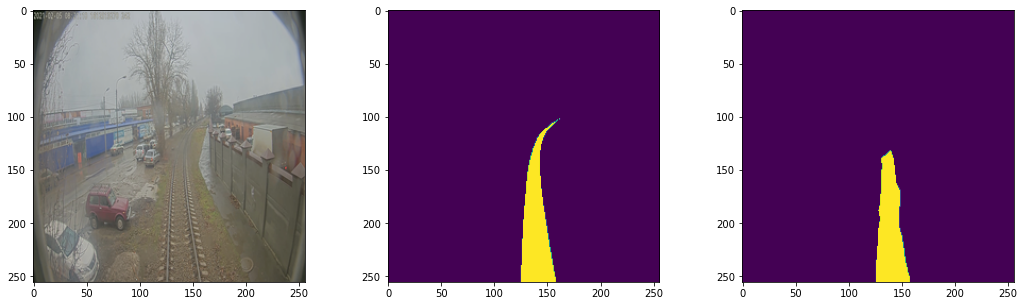

out.shape  (256, 256) , out[120][60]=   0 , out[80][10]=   0
Y.shape    (256, 256) , Y[120][60]=     0 , Y[80][10]=     0


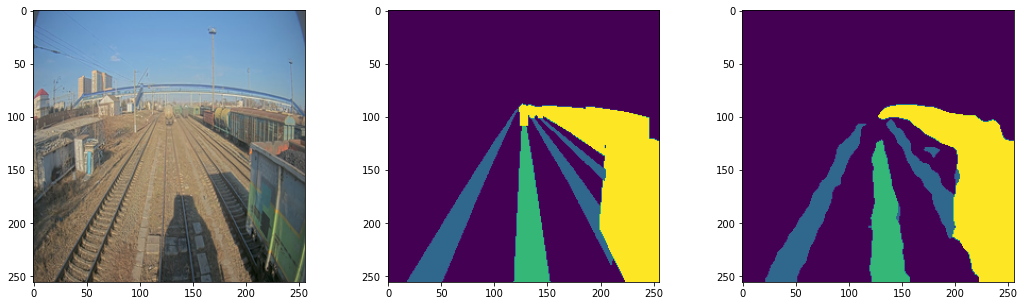

out.shape  (256, 256) , out[120][60]=   0 , out[80][10]=   0
Y.shape    (256, 256) , Y[120][60]=     0 , Y[80][10]=     0


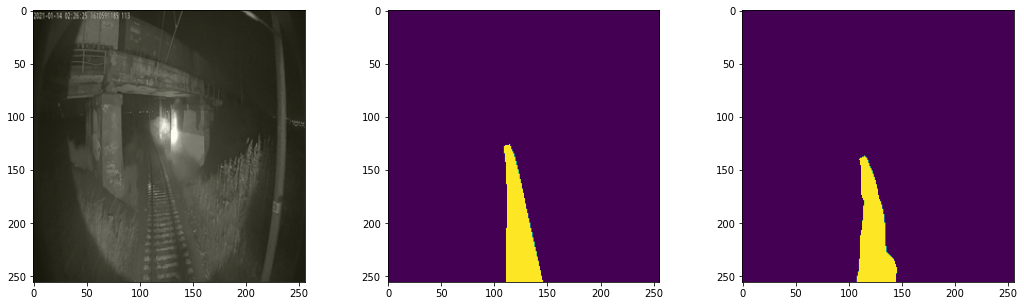

In [ ]:
outPutSegment(3)

out.shape  (256, 256) , out[120][60]=   3 , out[80][10]=   0
Y.shape    (256, 256) , Y[120][60]=     3 , Y[80][10]=     0


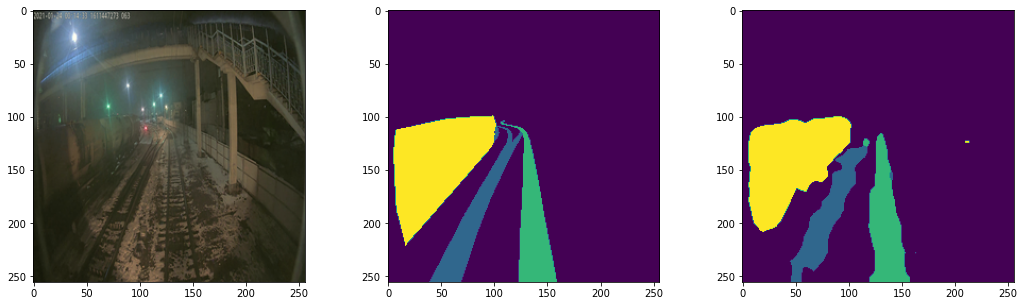

out.shape  (256, 256) , out[120][60]=   3 , out[80][10]=   0
Y.shape    (256, 256) , Y[120][60]=     3 , Y[80][10]=     0


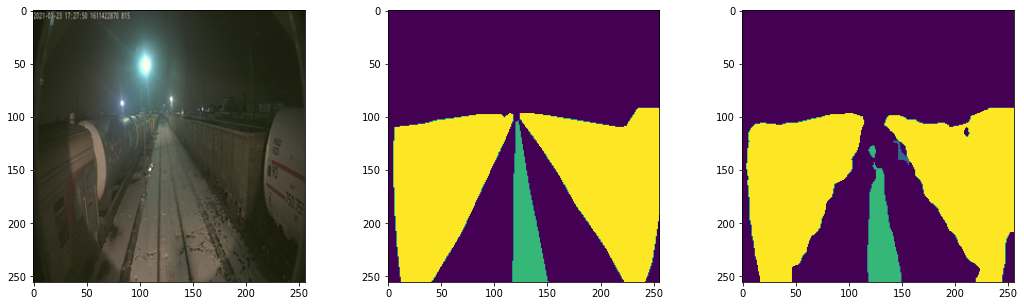

out.shape  (256, 256) , out[120][60]=   3 , out[80][10]=   0
Y.shape    (256, 256) , Y[120][60]=     3 , Y[80][10]=     0


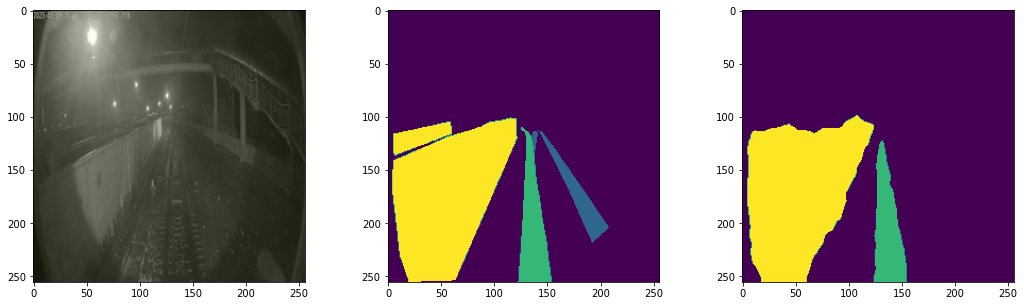

out.shape  (256, 256) , out[120][60]=   0 , out[80][10]=   0
Y.shape    (256, 256) , Y[120][60]=     0 , Y[80][10]=     0


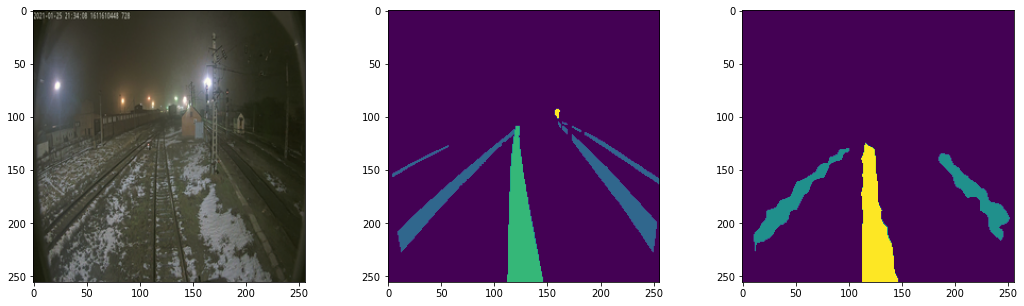

out.shape  (256, 256) , out[120][60]=   0 , out[80][10]=   0
Y.shape    (256, 256) , Y[120][60]=     0 , Y[80][10]=     0


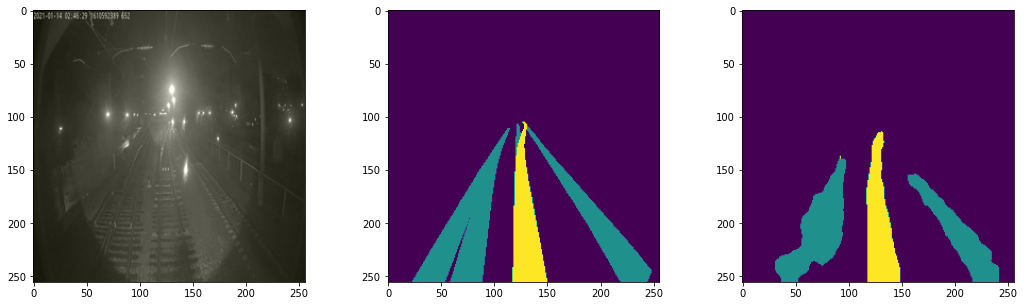

In [ ]:
outPutSegment(5)

# Predict Тестовый Набор, Dise 0.96 _ > Score = 0.611576

In [ ]:
# Загружаем лучшие веса
ResNet50.load_state_dict(torch.load('/content/drive/My Drive/ЦП-Москва/RZD/params_modelResNet50_51 эпох_loss_0.7832_Dice: 0.960.pth', map_location=torch.device('cpu') ))
ResNet50.eval()

FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [ ]:
TestIterator = iter(TestLoader)

In [ ]:
outAll = torch.argmax(nn.functional.softmax(ResNet50(TestIterator.next().to(device))['out'], dim=1), 1).cpu().numpy()

print(outAll.shape)                     # (1000, 256, 256)
setI = set(np.array(outAll.flat))
print('УНИКАЛЬНЫЕ ЗНАЧЕНИЯ_outAll', setI, '\n')

In [ ]:
# CheckingTEST(5, All_img, outAll)

## номер класса _на Тестовый Набор, Dise 0.96 _ > Score = 0.611576

In [ ]:
print(len(imagesTESTList))
print(len(imagesTESTListSize))

1000
1000


In [ ]:
size = imagesTESTListSize[0]
size 

(2688, 1512)

In [ ]:
from tensorflow.keras.preprocessing import image
from PIL import Image
import cv2

# Функция преобразования индекса в цвет пикселя
def CLASS2Index(channel):
    index = channel[0]
    if index == 0: return [0., 0., 0.] 
    elif index == 1: return [6., 6., 6.]    # Темно Синий - БОКОВЫЕ РЕЛЬСЫ
    elif index == 2: return [7., 7., 7.]      # ЗЕЛЕНЫЙ - РЕЛЬСЫ ПО КОТОРЫМ ЕДИМ
    elif index == 3: return [10., 10., 10.]    # белый - СОСТАВ ВАГОНА


# Функция перевода индекса пикслея
def CLASS2rgb2(MaskArray): 
  shapeM = MaskArray.shape 
  MaskArray = MaskArray.reshape(shapeM[0] * shapeM[1], 1) # Решейпим в двумерный массив
  newY = []                       # Создаем пустой лист
  for i in range(len(MaskArray)):       # Проходим по всем трем канала изображения
    newY.append(np.array(CLASS2Index(MaskArray[i])))
  # newY = np.array(newY)             # Преобразуем в numpy
  newY = np.array(newY).reshape(shapeM[0], shapeM[1], 3) # Решейпим (256,256,3)
  return newY  

def resizeFrame(frame, size ):
    return cv2.resize(frame, size, interpolation = cv2.INTER_NEAREST)

def translateRGBChannelAndUP(outAll, index, indexOut, folder = '5'):
    filename = imagesTESTList[index]
    MaskArray = outAll[indexOut][..., None]    # (256,256,1):  {0, 1, 2, 3}
    MaskArray = CLASS2rgb2(MaskArray)       # (256,256,3): {0.0, 6.0, 7.0, 10.0}
    #### МЕНЯЕМ РАЗМЕР
    size = imagesTESTListSize[index]
    # MaskArray = cv2.resize(MaskArray, size, interpolation = cv2.INTER_NEAREST)
    #### Сохраняем
    # cv2.imwrite(os.path.join(TESTLabel, folder, filename), MaskArray)  # САМОЕ ЛУЧШЕЕ СОХРАНЕНИЕ!!!!!!
    
    cv2.imwrite(os.path.join(TESTLabel, folder, filename), cv2.resize(MaskArray, size, interpolation = cv2.INTER_NEAREST))
    if (index%200) == 0: print('index ', index, ', name ', filename)

In [ ]:
print(len(imagesTESTList))
print(len(imagesTESTListSize))
# print(outAll.shape)

1000
1000


In [ ]:
for ind in range(len(imagesTESTList)):
  translateRGBChannelAndUP(outAll, ind, folder = 'ResNet_256_51')

index  0 , name  img_0.00045504180876976275.png
index  500 , name  img_0.5006019036845248.png


In [ ]:
print(len(imagesTESTList))
print(len(os.listdir(os.path.join(TESTLabel,'ResNet_256_51'))))

1000
1000


In [ ]:
def outPutSegmentTEST3(blok):
  ResNet50.eval() # режим проверки
  TestIterator = iter(TestLoader)
  # for i, (images) in enumerate(TestLoader):  
  for _ in range(blok):
    _ = TestIterator.next()
  
  for i in range(blok, 4):
                         # Отдельно считаем Softmax(dim=1)
    outAll = torch.argmax(nn.functional.softmax(ResNet50(TestIterator.next().to(device))['out'], dim=1), 1).cpu().numpy()
    
    print(outAll.shape)                     # (1000, 256, 256)
    setI = set(np.array(outAll.flat))
    print('УНИКАЛЬНЫЕ ЗНАЧЕНИЯ_outAll', setI, '\n')
    
    indexOut = -1
    for ind in range(250*i, 250*(i+1)):
      indexOut += 1 
      translateRGBChannelAndUP(outAll, ind, indexOut, folder = 'ResNet_256_51')

    print('Завершено', 250*(i+1), 'штук \n')

In [ ]:
len(imagesTESTList)

1000

In [ ]:
outPutSegmentTEST3()

(250, 256, 256)
УНИКАЛЬНЫЕ ЗНАЧЕНИЯ_outAll {0, 1, 2, 3} 

index  0 , name  img_0.00045504180876976275.png
index  200 , name  img_0.18385731398921934.png
Завершено 250 штук 

(250, 256, 256)
УНИКАЛЬНЫЕ ЗНАЧЕНИЯ_outAll {0, 1, 2, 3} 



IndexError: ignored

In [ ]:
print(len(imagesTESTList))
print(len(os.listdir(os.path.join(TESTLabel,'ResNet_256_51'))))

1000
250


In [ ]:
outPutSegmentTEST3(1)

(250, 256, 256)
УНИКАЛЬНЫЕ ЗНАЧЕНИЯ_outAll {0, 1, 2, 3} 

index  400 , name  img_0.3876948436261395.png
Завершено 500 штук 

(250, 256, 256)
УНИКАЛЬНЫЕ ЗНАЧЕНИЯ_outAll {0, 1, 2, 3} 

index  600 , name  img_0.6157483085456682.png
Завершено 750 штук 

(250, 256, 256)
УНИКАЛЬНЫЕ ЗНАЧЕНИЯ_outAll {0, 1, 2, 3} 

index  800 , name  img_0.7903541113480738.png
Завершено 1000 штук 



In [ ]:
print(len(imagesTESTList))
print(len(os.listdir(os.path.join(TESTLabel,'ResNet_256_51'))))

1000
1000


> Score = 0.611576

# Дообучение +44 эпох = 95 эпох (learningRate = 0.00001 )

In [ ]:
learningRate = 0.00001 
# Критерии Ошибки
# nn.CrossEntropyLoss()  -  Нужно падавать только метки(НЕ one_hot) !!!!!!
criterion = nn.CrossEntropyLoss() 

optimizer = torch.optim.Adam(ResNet50.classifier.parameters(), 
                             lr=learningRate) #learning_rate
                             
# Загружаем лучшие веса
ResNet50.load_state_dict(torch.load('/content/drive/My Drive/ЦП-Москва/RZD/params_modelResNet50_51 эпох_loss_0.7832_Dice: 0.960.pth'))  # , map_location=torch.device('cpu') 
 

<All keys matched successfully>

In [ ]:
losses, dices = TrainModel(numEpochs = 30, minLoss = 0.7832, maxDices = 0.96)

Эпоха: [1/30], Шаг: [10/683], Потеря: 0.7764, Dice: 0.965
Эпоха: [1/30], Шаг: [20/683], Потеря: 0.7819, Dice: 0.959
Эпоха: [1/30], Шаг: [30/683], Потеря: 0.7915, Dice: 0.949
Эпоха: [1/30], Шаг: [40/683], Потеря: 0.7930, Dice: 0.947
Эпоха: [1/30], Шаг: [50/683], Потеря: 0.7897, Dice: 0.950
Эпоха: [1/30], Шаг: [60/683], Потеря: 0.7757, Dice: 0.965
Эпоха: [1/30], Шаг: [70/683], Потеря: 0.7789, Dice: 0.962
Эпоха: [1/30], Шаг: [80/683], Потеря: 0.7831, Dice: 0.958
Эпоха: [1/30], Шаг: [90/683], Потеря: 0.7767, Dice: 0.964
Эпоха: [1/30], Шаг: [100/683], Потеря: 0.7734, Dice: 0.968
Эпоха: [1/30], Шаг: [110/683], Потеря: 0.7722, Dice: 0.969
Эпоха: [1/30], Шаг: [120/683], Потеря: 0.7717, Dice: 0.970
Эпоха: [1/30], Шаг: [130/683], Потеря: 0.7730, Dice: 0.969
Эпоха: [1/30], Шаг: [140/683], Потеря: 0.7756, Dice: 0.965
Эпоха: [1/30], Шаг: [150/683], Потеря: 0.7883, Dice: 0.952
Эпоха: [1/30], Шаг: [160/683], Потеря: 0.7806, Dice: 0.960
Эпоха: [1/30], Шаг: [170/683], Потеря: 0.7850, Dice: 0.956
Эпоха:

In [ ]:
# plt.plot(losses) # График нашего обучения
# plt.show()
# plt.plot(dices) # График нашего обучения
# plt.show()
print(losses)
print(dices)

[tensor(0.7831, device='cuda:0'), tensor(0.7831, device='cuda:0'), tensor(0.7829, device='cuda:0'), tensor(0.7829, device='cuda:0'), tensor(0.7828, device='cuda:0'), tensor(0.7827, device='cuda:0'), tensor(0.7826, device='cuda:0'), tensor(0.7826, device='cuda:0'), tensor(0.7825, device='cuda:0'), tensor(0.7824, device='cuda:0'), tensor(0.7823, device='cuda:0'), tensor(0.7822, device='cuda:0'), tensor(0.7822, device='cuda:0'), tensor(0.7821, device='cuda:0'), tensor(0.7820, device='cuda:0'), tensor(0.7820, device='cuda:0'), tensor(0.7818, device='cuda:0'), tensor(0.7818, device='cuda:0'), tensor(0.7817, device='cuda:0'), tensor(0.7816, device='cuda:0'), tensor(0.7816, device='cuda:0'), tensor(0.7815, device='cuda:0'), tensor(0.7814, device='cuda:0'), tensor(0.7814, device='cuda:0'), tensor(0.7813, device='cuda:0'), tensor(0.7812, device='cuda:0'), tensor(0.7812, device='cuda:0'), tensor(0.7811, device='cuda:0'), tensor(0.7810, device='cuda:0'), tensor(0.7810, device='cuda:0')]
[tensor(0

In [ ]:
losses, dices = TrainModel(numEpochs = 30, minLoss = 0.781, maxDices = 0.963)

Эпоха: [1/30], Шаг: [10/683], Потеря: 0.7779, Dice: 0.964
Эпоха: [1/30], Шаг: [20/683], Потеря: 0.7866, Dice: 0.955
Эпоха: [1/30], Шаг: [30/683], Потеря: 0.7843, Dice: 0.956
Эпоха: [1/30], Шаг: [40/683], Потеря: 0.7746, Dice: 0.967
Эпоха: [1/30], Шаг: [50/683], Потеря: 0.7851, Dice: 0.956
Эпоха: [1/30], Шаг: [60/683], Потеря: 0.7858, Dice: 0.955
Эпоха: [1/30], Шаг: [70/683], Потеря: 0.7882, Dice: 0.953
Эпоха: [1/30], Шаг: [80/683], Потеря: 0.7823, Dice: 0.958
Эпоха: [1/30], Шаг: [90/683], Потеря: 0.7846, Dice: 0.957
Эпоха: [1/30], Шаг: [100/683], Потеря: 0.7869, Dice: 0.954
Эпоха: [1/30], Шаг: [110/683], Потеря: 0.7919, Dice: 0.949
Эпоха: [1/30], Шаг: [120/683], Потеря: 0.7803, Dice: 0.961
Эпоха: [1/30], Шаг: [130/683], Потеря: 0.7812, Dice: 0.960
Эпоха: [1/30], Шаг: [140/683], Потеря: 0.7791, Dice: 0.962
Эпоха: [1/30], Шаг: [150/683], Потеря: 0.7792, Dice: 0.962
Эпоха: [1/30], Шаг: [160/683], Потеря: 0.7975, Dice: 0.943
Эпоха: [1/30], Шаг: [170/683], Потеря: 0.7772, Dice: 0.964
Эпоха:

In [ ]:
print(losses)
print(dices)

# Predict Тестовый Набор, Dise 0,9635_  > Score = 0.6071

In [ ]:
# Загружаем лучшие веса
ResNet50.load_state_dict(torch.load('/content/drive/My Drive/ЦП-Москва/RZD/params_modelResNet50_95 эпох_loss_0.7801_Dice: 0.9635.pth', map_location=torch.device('cpu') ))
ResNet50.eval()

FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [ ]:
print(len(imagesTESTList))
print(len(imagesTESTListSize))

1000
1000


In [ ]:
outPutSegmentTEST3(0, 'ResNet_256_95')

(250, 256, 256)
УНИКАЛЬНЫЕ ЗНАЧЕНИЯ_outAll {0, 1, 2, 3} 

index  0 , name  img_0.00045504180876976275.png
index  200 , name  img_0.18385731398921934.png
Завершено 250 штук 

(250, 256, 256)
УНИКАЛЬНЫЕ ЗНАЧЕНИЯ_outAll {0, 1, 2, 3} 

index  400 , name  img_0.3876948436261395.png
Завершено 500 штук 

(250, 256, 256)
УНИКАЛЬНЫЕ ЗНАЧЕНИЯ_outAll {0, 1, 2, 3} 

index  600 , name  img_0.6157483085456682.png
Завершено 750 штук 

(250, 256, 256)
УНИКАЛЬНЫЕ ЗНАЧЕНИЯ_outAll {0, 1, 2, 3} 

index  800 , name  img_0.7903541113480738.png
Завершено 1000 штук 



In [ ]:
print(len(imagesTESTList))
print(len(os.listdir(os.path.join(TESTLabel,'ResNet_256_95'))))

1000
1000


# Дообучение +____ эпох (learningRate = 0.000001 )

In [ ]:
learningRate = 0.000001 
# Критерии Ошибки
# nn.CrossEntropyLoss()  -  Нужно падавать только метки(НЕ one_hot) !!!!!!
criterion = nn.CrossEntropyLoss() 

optimizer = torch.optim.Adam(ResNet50.classifier.parameters(), 
                             lr=learningRate) #learning_rate
                             
# Загружаем лучшие веса
ResNet50.load_state_dict(torch.load('/content/drive/My Drive/ЦП-Москва/RZD/params_modelResNet50_95 эпох_loss_0.7801_Dice: 0.9635.pth'))  # , map_location=torch.device('cpu') 
 

<All keys matched successfully>

In [ ]:
losses, dices = TrainModel(numEpochs = 30, minLoss = 0.7801, maxDices = 0.9635)

Эпоха: [1/30], Шаг: [10/683], Потеря: 0.7848, Dice: 0.956
Эпоха: [1/30], Шаг: [20/683], Потеря: 0.7799, Dice: 0.961
Эпоха: [1/30], Шаг: [30/683], Потеря: 0.7825, Dice: 0.958
Эпоха: [1/30], Шаг: [40/683], Потеря: 0.7729, Dice: 0.968
Эпоха: [1/30], Шаг: [50/683], Потеря: 0.7904, Dice: 0.951
Эпоха: [1/30], Шаг: [60/683], Потеря: 0.7664, Dice: 0.975
Эпоха: [1/30], Шаг: [70/683], Потеря: 0.7762, Dice: 0.965
Эпоха: [1/30], Шаг: [80/683], Потеря: 0.7853, Dice: 0.956
Эпоха: [1/30], Шаг: [90/683], Потеря: 0.7882, Dice: 0.952
Эпоха: [1/30], Шаг: [100/683], Потеря: 0.7675, Dice: 0.974
Эпоха: [1/30], Шаг: [110/683], Потеря: 0.7793, Dice: 0.962
Эпоха: [1/30], Шаг: [120/683], Потеря: 0.7693, Dice: 0.972
Эпоха: [1/30], Шаг: [130/683], Потеря: 0.7749, Dice: 0.966
Эпоха: [1/30], Шаг: [140/683], Потеря: 0.7711, Dice: 0.970
Эпоха: [1/30], Шаг: [150/683], Потеря: 0.7789, Dice: 0.962
Эпоха: [1/30], Шаг: [160/683], Потеря: 0.7733, Dice: 0.968
Эпоха: [1/30], Шаг: [170/683], Потеря: 0.7823, Dice: 0.958
Эпоха:

In [ ]:
# plt.plot(losses) # График нашего обучения
# plt.show()
# plt.plot(dices) # График нашего обучения
# plt.show()
print(losses)
print(dices)

In [ ]:
losses, dices = TrainModel(numEpochs = 30, minLoss = 0.781, maxDices = 0.963)

In [ ]:
print(losses)
print(dices)